            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

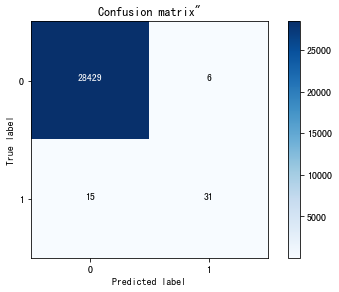

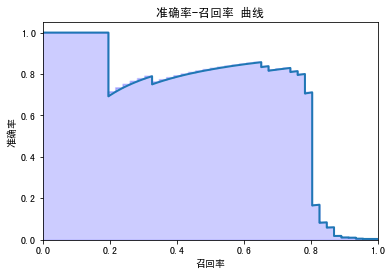

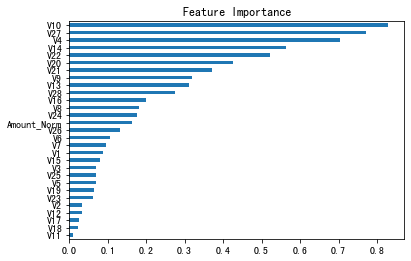

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('./creditcard.csv')
print(data)
print(data.shape)
print(data.describe())

#画混淆矩阵
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


#规范化
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
y = np.array(data.Class.tolist())
data = data.drop(['Time', 'Class', 'Amount'], axis = 1)

X = data
print(X)
print(y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size= 0.1)

clf = LogisticRegression()
clf.fit(train_x, train_y)

predict_y = clf.predict(test_x)

import itertools
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predict_y)

plot_confusion_matrix(cm, classes = [0,1], title = 'Confusion matrix"', cmap = plt.cm.Blues)

y_score = clf.decision_function(test_x)
from sklearn.metrics  import precision_recall_curve

precision , recall, thresholds = precision_recall_curve(test_y, y_score)
# precision-recall curve
#召回曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('准确率')
    plt.title('准确率-召回率 曲线')
    plt.show();

plot_precision_recall()

coeffs = clf.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)), columns=["coef_"])
# 下标设置为Feature Name
df_co.index = data.columns
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()
